In [14]:
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk
!pip install emoji
!pip install Sastrawi nltk
!pip install translate nltk

In [15]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_excel('/content/Prabowo_Ready to Preprocessing (2).xlsx', sheet_name='Sheet2')
df.head()

,Publish Date,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN)
0,"5/24/2024, 11:43:31 AM",nur93.41,kapan bapak bertugas semoga apa yang dijanjika...,"Kapan bapak bertugas, semoga apa yang dijanjik...","When will you be on duty, hopefully what you p...","When you are on duty, hopefully what you promi..."
1,"5/24/2024, 6:50:41 PM",wahyuciptaa,terimakasih tiada henti kami haturkan atas tan...,terimakasih tiada henti kami haturkan atas tan...,We thank you endlessly for your extraordinary ...,We express our endless gratitude for your extr...
2,"5/25/2024, 1:20:07 PM",zie_rizqi,sebut saja sebut pak jangan malu malu kaya say...,@iqbalfarabi sebut saja sebut pak jangan malu ...,"just say it, sir, don't be embarrassed like me...","@iqbalfarabi just say it, sir, don't be embarr..."
3,"5/26/2024, 9:43:00 AM",bamsat888,pak presiden tolong pak pendidikan gratis hing...,"Pak Presiden, tolong Pak pendidikan gratis hin...","Mr. President, please, sir, free education up ...","Mr President, please sir, free education up to..."
4,"5/26/2024, 6:40:01 PM",rosiah120792,alhamdulilah,Alhamdulilah ❤️❤️❤️,Thank God,Thank God ❤️❤️❤️


In [17]:
# df = df.head(20000)

In [18]:
df.columns

Index(['Publish Date', 'Cleaned Comment Text', 'Comment Text', 'User Name',
       'Unnamed: 4', 'Cleaned Comment Text.1', 'Comment Text.1'],
      dtype='object')

In [21]:
df = df[['User Name','Cleaned Comment Text', 'Comment Text',
       'Cleaned Comment Text (EN)', 'Comment Text (EN)']]
df.head()

,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN)
0,nur93.41,kapan bapak bertugas semoga apa yang dijanjika...,"Kapan bapak bertugas, semoga apa yang dijanjik...","When will you be on duty, hopefully what you p...","When you are on duty, hopefully what you promi..."
1,wahyuciptaa,terimakasih tiada henti kami haturkan atas tan...,terimakasih tiada henti kami haturkan atas tan...,We thank you endlessly for your extraordinary ...,We express our endless gratitude for your extr...
2,zie_rizqi,sebut saja sebut pak jangan malu malu kaya say...,@iqbalfarabi sebut saja sebut pak jangan malu ...,"just say it, sir, don't be embarrassed like me...","@iqbalfarabi just say it, sir, don't be embarr..."
3,bamsat888,pak presiden tolong pak pendidikan gratis hing...,"Pak Presiden, tolong Pak pendidikan gratis hin...","Mr. President, please, sir, free education up ...","Mr President, please sir, free education up to..."
4,rosiah120792,alhamdulilah,Alhamdulilah ❤️❤️❤️,Thank God,Thank God ❤️❤️❤️


In [22]:
df["Cleaned (EN)"] = df["Comment Text (EN)"].str.lower()
df.head()

,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN),Cleaned (EN)
0,nur93.41,kapan bapak bertugas semoga apa yang dijanjika...,"Kapan bapak bertugas, semoga apa yang dijanjik...","When will you be on duty, hopefully what you p...","When you are on duty, hopefully what you promi...","when you are on duty, hopefully what you promi..."
1,wahyuciptaa,terimakasih tiada henti kami haturkan atas tan...,terimakasih tiada henti kami haturkan atas tan...,We thank you endlessly for your extraordinary ...,We express our endless gratitude for your extr...,we express our endless gratitude for your extr...
2,zie_rizqi,sebut saja sebut pak jangan malu malu kaya say...,@iqbalfarabi sebut saja sebut pak jangan malu ...,"just say it, sir, don't be embarrassed like me...","@iqbalfarabi just say it, sir, don't be embarr...","@iqbalfarabi just say it, sir, don't be embarr..."
3,bamsat888,pak presiden tolong pak pendidikan gratis hing...,"Pak Presiden, tolong Pak pendidikan gratis hin...","Mr. President, please, sir, free education up ...","Mr President, please sir, free education up to...","mr president, please sir, free education up to..."
4,rosiah120792,alhamdulilah,Alhamdulilah ❤️❤️❤️,Thank God,Thank God ❤️❤️❤️,thank god ❤️❤️❤️


In [23]:
df = df.copy()
df80000 = df
df80000.head()

,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN),Cleaned (EN)
0,nur93.41,kapan bapak bertugas semoga apa yang dijanjika...,"Kapan bapak bertugas, semoga apa yang dijanjik...","When will you be on duty, hopefully what you p...","When you are on duty, hopefully what you promi...","when you are on duty, hopefully what you promi..."
1,wahyuciptaa,terimakasih tiada henti kami haturkan atas tan...,terimakasih tiada henti kami haturkan atas tan...,We thank you endlessly for your extraordinary ...,We express our endless gratitude for your extr...,we express our endless gratitude for your extr...
2,zie_rizqi,sebut saja sebut pak jangan malu malu kaya say...,@iqbalfarabi sebut saja sebut pak jangan malu ...,"just say it, sir, don't be embarrassed like me...","@iqbalfarabi just say it, sir, don't be embarr...","@iqbalfarabi just say it, sir, don't be embarr..."
3,bamsat888,pak presiden tolong pak pendidikan gratis hing...,"Pak Presiden, tolong Pak pendidikan gratis hin...","Mr. President, please, sir, free education up ...","Mr President, please sir, free education up to...","mr president, please sir, free education up to..."
4,rosiah120792,alhamdulilah,Alhamdulilah ❤️❤️❤️,Thank God,Thank God ❤️❤️❤️,thank god ❤️❤️❤️


In [24]:
df80000.shape

(62956, 6)

In [25]:
import string

# Define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(remove_punctuation)

In [26]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already installed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
from collections import Counter

# Identify the most common words
word_counts = Counter(" ".join(df['Cleaned (EN)']).split())
frequent_words = set([word for word, count in word_counts.most_common(10)])  # Adjust the number as needed

# Function to remove frequent words
def remove_frequent_words(text):
    return ' '.join([word for word in text.split() if word not in frequent_words])

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(remove_frequent_words)

In [28]:
# Identify rare words
rare_words = set([word for word, count in word_counts.items() if count == 1])  # Adjust threshold as needed

# Function to remove rare words
def remove_rare_words(text):
    return ' '.join([word for word in text.split() if word not in rare_words])

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(remove_rare_words)

In [29]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem words
def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(stemming)

In [30]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [31]:
!pip install emoji

In [32]:
import emoji

# Function to remove emojis
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')  # Replace emojis with an empty string

df80000['Cleaned (EN)'] = df80000['Comment Text (EN)'].apply(remove_emojis) # OR

In [ ]:
'''
# Function to convert emojis to words
def convert_emojis_to_words(text):
    return emoji.demojize(text)

df80000['Cleaned (EN)'] = df80000['Comment Text (EN)'].apply(convert_emojis_to_words)
'''

In [33]:
# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(remove_urls)

In [34]:
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(remove_html_tags)

<ipython-input-34-e5550443fc57>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [ ]:
'''chat_words = {'u': 'you', 'r': 'are', 'lol': 'laughing out loud', 'omg': 'oh my god'}  # Expand as needed

# Function to convert chat words
def convert_chat_words(text):
    return ' '.join([chat_words[word] if word in chat_words else word for word in text.split()])

df['Cleaned (EN)'] = df['Cleaned (EN)'].apply(convert_chat_words)'''

In [35]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.1 MB/s eta 0:00:00


In [36]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
from spellchecker import SpellChecker

# Initialize SpellChecker
spell = SpellChecker()

# Function for spell correction with progress bar
def correct_spelling_with_progress(df_column):
    corrected_texts = []
    # Use tqdm to wrap the iterable and display progress
    for text in tqdm(df_column, desc="Processing"):
        corrected_text = []
        for word in text.split():
            corrected_word = spell.correction(word)
            corrected_text.append(corrected_word if corrected_word is not None else word)
        corrected_texts.append(' '.join(corrected_text))
    return corrected_texts

# Apply the function with progress bar to the dataframe column
df80000['Cleaned (EN)'] = correct_spelling_with_progress(df80000['Cleaned (EN)'])

Processing:   0%|          | 90/62956 [02:51<30:09:48,  1.73s/it]

In [ ]:
# !pip install textblob

In [ ]:
'''from textblob import TextBlob

# Function for spelling correction
def correct_spelling(text):
    return str(TextBlob(text).correct())

df['Cleaned (EN)'] = df['Cleaned (EN)'].apply(correct_spelling)'''

In [ ]:
import re

def symbol_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Extract words from hashtags
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove all punctuation except for exclamation and question marks
    text = re.sub(r'[^\w\s!?]', '', text)
    return text

df80000['Cleaned (EN)'] = df80000['Cleaned (EN)'].apply(symbol_text)

In [ ]:
df80000[['Comment Text (EN)', 'Cleaned (EN)']]

In [ ]:
!pip install textblob vaderSentiment transformers torch --quiet

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

In [ ]:
# Function to label sentiment using TextBlob
def get_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply to the dataset
df80000['TextBlob_Sentiment'] = df80000['Cleaned (EN)'].apply(get_sentiment_textblob)

In [ ]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to label sentiment using VADER
def get_sentiment_vader(text):
    compound = vader_analyzer.polarity_scores(text)['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply to the dataset
df80000['VADER_Sentiment'] = df80000['Cleaned (EN)'].apply(get_sentiment_vader)

In [ ]:
# Load the sentiment analysis pipeline from transformers (DistilBERT)
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to get sentiment using DistilBERT
def get_sentiment_transformer(text):
    result = classifier(text)[0]
    return result['label'].lower()  # returns 'positive' or 'negative'

# Apply to the dataset
df80000['Transformers_Sentiment'] = df80000['Cleaned (EN)'].apply(get_sentiment_transformer)

In [ ]:
df80000[['Comment Text','Cleaned (EN)', 'TextBlob_Sentiment', 'VADER_Sentiment', 'Transformers_Sentiment']]

In [ ]:
df80000.to_excel("EN 80000 Dataset Train Prabowo.xlsx", index=False)

PERTIMBANGAN TERAKHIR UNTUK LABELING AKAN MENGGUNAKAN VADER KARENA

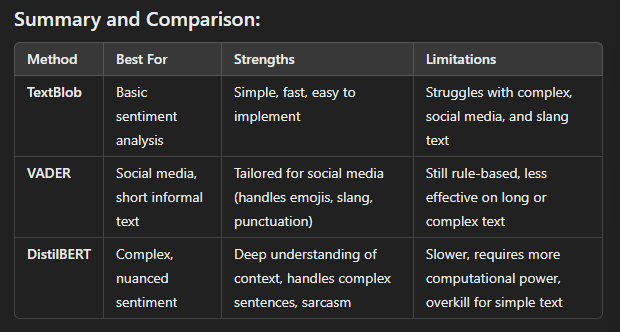

# Evaluasi

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fungsi umum untuk training dan evaluasi model
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name, model):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print detailed classification report
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))

    # Return results as a dictionary
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Preprocessing text data with CountVectorizer
vectorizer = CountVectorizer()

# Split dataset based on each auto-labeling method (BERT, TextBlob, VADER)
auto_label_methods = ['TextBlob_Sentiment', 'VADER_Sentiment', 'Transformers_Sentiment']
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

results = []

for method in auto_label_methods:
    print(f"\n### Evaluating with auto labels from {method} ###")

    # Extract feature vectors from text
    X = df80000['Cleaned (EN)']
    X_vect = vectorizer.fit_transform(X)

    # Split data for training and testing
    y = df80000[method]
    X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.1, random_state=42)

    for model_name, model in models.items():
        # Train and evaluate the model
        result = train_and_evaluate(X_train, X_test, y_train, y_test, model_name, model)
        result['auto_label_method'] = method
        results.append(result)

# Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df.to_excel("EN 80000 Dataset Train Prabowo.xlsx", index=False)

# Step 4: Visualisasi Perbandingan Performa
# Membuat plot untuk perbandingan setiap metode auto-labeling dan model
plt.figure(figsize=(15, 8))
sns.barplot(data=results_df, x='auto_label_method', y='accuracy', hue='model', palette='viridis')
plt.title('Perbandingan Akurasi untuk Setiap Metode Auto Labeling dan Model')
plt.ylabel('Accuracy')
plt.xlabel('Auto Labeling Method')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=results_df, x='auto_label_method', y='f1_score', hue='model', palette='coolwarm')
plt.title('Perbandingan F1-Score untuk Setiap Metode Auto Labeling dan Model')
plt.ylabel('F1-Score')
plt.xlabel('Auto Labeling Method')
plt.legend(loc='lower right')
plt.show()

# Visualisasi Confusion Matrix untuk setiap model dan metode auto labeling
for method in auto_label_methods:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, model_name in enumerate(models.keys()):
        cm = results_df[(results_df['model'] == model_name) & (results_df['auto_label_method'] == method)]['confusion_matrix'].values[0]
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="YlGnBu")
        axes[i].set_title(f'Confusion Matrix: {model_name} ({method})')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

In [ ]:
# Hitung jumlah unique count untuk setiap metode auto-labeling sentiment
vader_counts = df80000['VADER_Sentiment'].value_counts()
textblob_counts = df80000['TextBlob_Sentiment'].value_counts()
bert_counts = df80000['Transformers_Sentiment'].value_counts()

# Tampilkan hasilnya
print("Jumlah Sentimen Unik berdasarkan VADER Sentiment:")
print(vader_counts)

print("\nJumlah Sentimen Unik berdasarkan TextBlob Sentiment:")
print(textblob_counts)

print("\nJumlah Sentimen Unik berdasarkan Transformers (BERT) Sentiment:")
print(bert_counts)